# Basic Boosters

* [AdaBoost](#AdaBoost)
* [Gradient Boosting](#Gradient-Boosting)
* [Balance Testing](#Balance-Testing)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'

In [5]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score, precision_score

In [6]:
teledf = pd.read_csv('data/teledf_final.csv', index_col = 0)
teledf.head()

,Total day charge,Total intl calls,Area code_415,Area code_510,Total eve minutes,Total day minutes,Total day calls,Voice mail plan,Area code_408,Customer service calls,International plan,Churn,Number vmail messages,Total intl minutes,Total intl charge,Total eve charge
0,45.07,3.0,1.0,0.0,197.4,265.1,110.0,1.0,0.0,1.0,0.0,0.0,25.0,10.0,2.70,16.78
1,27.47,3.0,1.0,0.0,195.5,161.6,123.0,1.0,0.0,1.0,0.0,0.0,26.0,13.7,3.70,16.62
2,41.38,5.0,1.0,0.0,121.2,243.4,114.0,0.0,0.0,0.0,0.0,0.0,0.0,12.2,3.29,10.30
3,50.90,7.0,0.0,0.0,61.9,299.4,71.0,0.0,1.0,2.0,1.0,0.0,0.0,6.6,1.78,5.26
4,28.34,3.0,1.0,0.0,148.3,166.7,113.0,0.0,0.0,3.0,1.0,0.0,0.0,10.1,2.73,12.61


In [7]:
X = teledf.drop(columns = 'Churn')
y = teledf.Churn

In [8]:
X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, test_size = 0.2, random_state = 42)

# AdaBoost

In [33]:

ada_model  = AdaBoostClassifier(random_state = 42)

ada_model.fit(X_train, y_train.values.ravel())
ada_model.score(X_train,y_train), ada_model.score(X_val, y_val)


(0.8916510318949343, 0.8632958801498127)

In [ ]:
y_train_ada_pred = ada_model.predict(X_train)
y_val_ada_pred = ada_model.predict(X_val)

In [34]:
def getscores (true, pred):
    print(f'Recall: {recall_score(true,pred)} \n Precision: {precision_score(true,pred)}')

In [35]:
getscores(y_train, y_train_ada_pred)
getscores(y_val, y_val_ada_pred)

Recall: 0.3935483870967742 
 Precision: 0.7393939393939394
Recall: 0.375 
 Precision: 0.5660377358490566


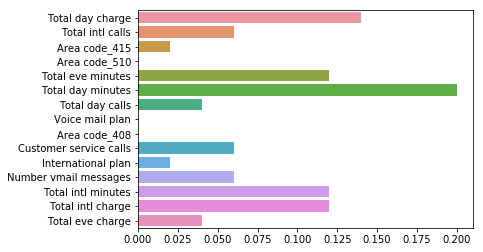

In [11]:
sns.barplot(y=X.columns,x=ada_model.feature_importances_)


Text(0.5, 1.0, 'Confusion Matrix for AdaBoost')

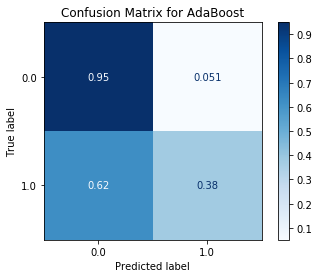

In [12]:
plot_confusion_matrix(ada_model, 
                      X_val,
                      y_val,
                      cmap= 'Blues', 
                      normalize = 'true')
plt.title('Confusion Matrix for AdaBoost')

# Gradient Boosting

In [13]:
gb_model = GradientBoostingClassifier(random_state = 42)

gb_model.fit(X_train, y_train)
gb_model.score(X_train, y_train), gb_model.score(X_val, y_val)

(0.9718574108818011, 0.947565543071161)

In [36]:
y_train_gb_pred = gb_model.predict(X_train)
y_val_gb_pred = gb_model.predict(X_val)

In [37]:
getscores(y_train, y_train_gb_pred)
getscores(y_val, y_val_gb_pred)

Recall: 0.8193548387096774 
 Precision: 0.9844961240310077
Recall: 0.7125 
 Precision: 0.9193548387096774


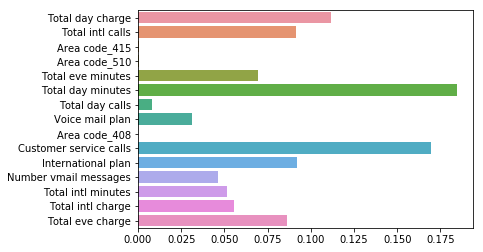

In [14]:
sns.barplot(y=X.columns, x=gb_model.feature_importances_)

Text(0.5, 1.0, 'Confusion Matrix for GradientBoost')

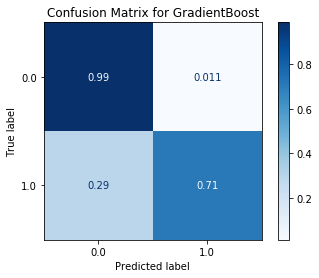

In [15]:
plot_confusion_matrix(gb_model, 
                      X_val,
                      y_val,
                      cmap='Blues', 
                      normalize='true')
plt.title('Confusion Matrix for GradientBoost')

# Balance Testing

In [16]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

random_over_sampler.RandomOverSampler: 
 Train recall: 0.818331503841932 
 Test recall: 0.6559139784946236 
 Train precision: 0.8628472222222222 
 Test precision: 0.8628472222222222


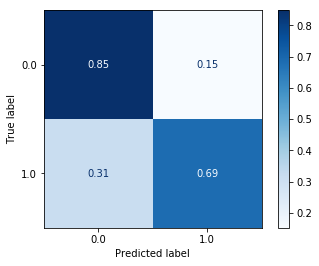

smote.SMOTE: 
 Train recall: 0.889681668496158 
 Test recall: 0.4946236559139785 
 Train precision: 0.9310740953475014 
 Test precision: 0.9310740953475014


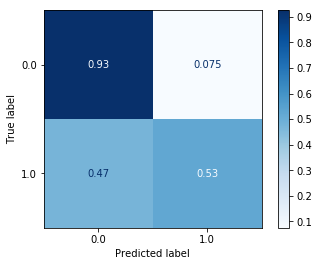

adasyn.ADASYN: 
 Train recall: 0.8822515795519816 
 Test recall: 0.4731182795698925 
 Train precision: 0.9303452453058753 
 Test precision: 0.9303452453058753


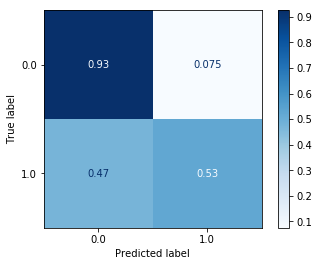

In [41]:
# testing for adaboost

for i in [RandomOverSampler, SMOTE, ADASYN]:
    balancer = i(random_state = 42)
    X_train_bal, y_train_bal = balancer.fit_resample(X_train, y_train)
    bal_ada_model = AdaBoostClassifier(random_state = 42)
    bal_ada_model.fit(X_train_bal, y_train_bal)
    y_train_bal_pred = bal_ada_model.predict(X_train_bal)
    y_test_bal_pred = bal_ada_model.predict(X_test)
    print(f'{str(i)[32:-2]}:', '\n',
          'Train recall:', recall_score(y_train_bal, y_train_bal_pred), '\n',
          'Test recall:', recall_score(y_test, y_test_bal_pred), '\n',
         'Train precision:', precision_score(y_train_bal, y_train_bal_pred), '\n',
         'Test precision:', precision_score(y_train_bal, y_train_bal_pred))
    plot_confusion_matrix(bal_ada_model, 
                      X_val,
                      y_val,
                      cmap='Blues', 
                      normalize='true')
    plt.show()

Random oversampling improved confusion matrix, but Gradient Boosting is still the superior booster.

random_over_sampler.RandomOverSampler: 
 Train recall: 0.8913282107574094 
 Test recall: 0.7956989247311828 
 Train precision: 0.9586776859504132 
 Test precision: 0.9586776859504132


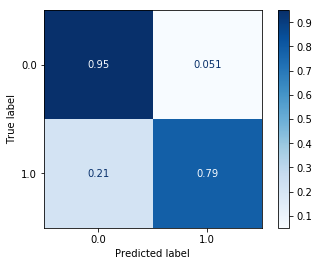

smote.SMOTE: 
 Train recall: 0.9527991218441273 
 Test recall: 0.6989247311827957 
 Train precision: 0.9886104783599089 
 Test precision: 0.9886104783599089


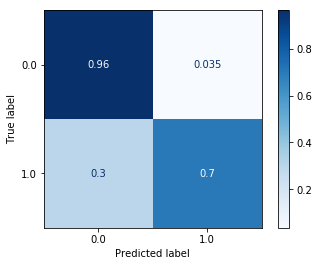

adasyn.ADASYN: 
 Train recall: 0.9523262492820218 
 Test recall: 0.6774193548387096 
 Train precision: 0.9845605700712589 
 Test precision: 0.9845605700712589


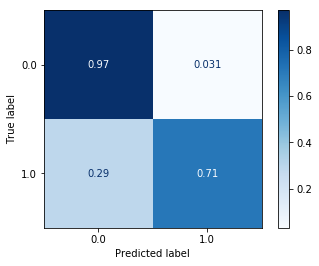

In [40]:
# testing for gradient boosting

for i in [RandomOverSampler, SMOTE, ADASYN]:
    balancer = i(random_state = 42)
    X_train_bal, y_train_bal = balancer.fit_resample(X_train, y_train)
    bal_gb_model = GradientBoostingClassifier(random_state = 42)
    bal_gb_model.fit(X_train_bal, y_train_bal)
    y_train_bal_pred = bal_gb_model.predict(X_train_bal)
    y_test_bal_pred = bal_gb_model.predict(X_test)
    print(f'{str(i)[32:-2]}:', '\n',
          'Train recall:', recall_score(y_train_bal, y_train_bal_pred), '\n',
          'Test recall:', recall_score(y_test, y_test_bal_pred), '\n',
         'Train precision:', precision_score(y_train_bal, y_train_bal_pred), '\n',
         'Test precision:', precision_score(y_train_bal, y_train_bal_pred))
    plot_confusion_matrix(bal_gb_model, 
                      X_val,
                      y_val,
                      cmap='Blues', 
                      normalize='true')
    plt.show()

Although scores changed, confusion matrix did not see improvement.